# Project C117

## Getting Data

In [94]:
import pandas
data_frame = pandas.read_csv('https://raw.githubusercontent.com/whitehatjr/datasets/master/c117/BankNote_Authentication.csv')

x = data_frame["variance"]
y = data_frame["class"]

print(data_frame.head())

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


## Train Test Split

In [95]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Logistic Regression

In [96]:
from sklearn.linear_model import LogisticRegression
import numpy

x = numpy.reshape(x_train.ravel(), (len(x_train), 1))
y = numpy.reshape(y_train.ravel(), (len(y_train), 1))

classifier = LogisticRegression(random_state=0)
classifier.fit(x, y)

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

## Prediction

In [97]:
x_test = numpy.reshape(x_test.ravel(), (len(x_test), 1))
y_test = numpy.reshape(y_test.ravel(), (len(y_test), 1))

prediction = classifier.predict(x_test)

predicted_values = []
for i in prediction:
    if i == 0:
        predicted_values.append("Authorized")
    else:
        predicted_values.append("Forged")

actual_values = []
for i in y_test.ravel():
    if i == 0:
        actual_values.append("Authorized")
    else:
        actual_values.append("Forged")

## Confusion Matrix

C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=['Forged', 'Authorized'] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[Text(0, 0.5, 'Forged'), Text(0, 1.5, 'Authorized')]

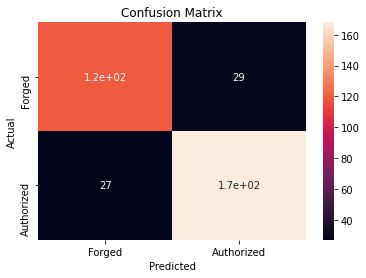

In [98]:
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

labels = ["Forged", "Authorized"]

conf_matrix = confusion_matrix(actual_values, predicted_values, labels)

ax = plt.subplot()
seaborn.heatmap(conf_matrix, annot=True, ax=ax)

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## Accuracy 

In [99]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, prediction)
print(f"Accuracy Score: {accuracy}")

Accuracy Score: 0.8367346938775511
